## TO DO
- [ ] <strike>Treinar um modelo, gerar novos dados apenas com volume e vazão diferentes, ver o desempenho</strike>
- [ ] <strike>Diferentes situações:</strike>
    - [x] reação inversa
    - [x] adiabática
- [x] <strike> Ver quanto tempo demora pra atingir o estado estacionário (provavelmente algumas amostras só)</strike>
- [x] <strike> Quantos pontos mínimos para treinar bem ?</strike>
- [ ] Gerar novo dataset com ordem 0, ver se outra função de ativação se adeua melhor

In [16]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
history = History()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('../data_section/datas/data_n100_Ea53000.0_k05000.0_V500_K2.csv', index_col=0)
V = 500

In [3]:
x_cols = ['Cae', 'Cbe', 'T']
y_col = ['Cc']

minmax = MinMaxScaler()
in_data = minmax.fit_transform(data[x_cols].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(in_data, data[y_col].to_numpy(), test_size=.3, )
Y_test = Y_test.reshape(Y_test.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

print(f'x train: {X_train.shape}, x test: {X_test.shape}')
print(f'y train: {Y_train.shape}, y test: {Y_test.shape}')

x train: (70, 3), x test: (30, 3)
y train: (70,), y test: (30,)


In [ ]:
model = Sequential()
model.add(Dense(90, input_dim=X_train.shape[1], activation='exponential'))
model.add(Dense(75, activation='exponential', ))
model.add(Dense(31, activation='softmax', ))
model.add(Dense(13, activation='exponential'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train, epochs=200, verbose=0, validation_split=.3, use_multiprocessing=True)
evaluate(model, X_train, X_test, Y_train, Y_test)

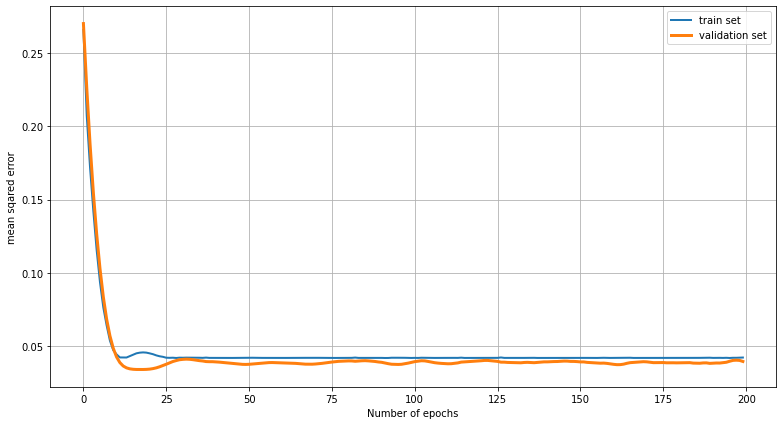

In [17]:
plot_loss_history(hist)

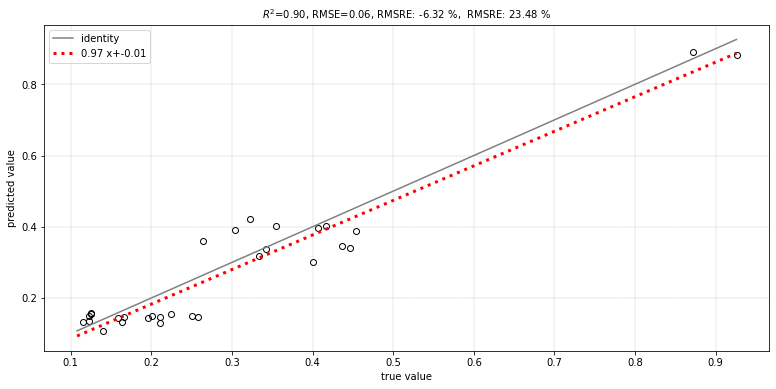

In [130]:
plot_identity_keras(model, X_test, Y_test)

In [131]:
model.save('n_100_v2.h5')

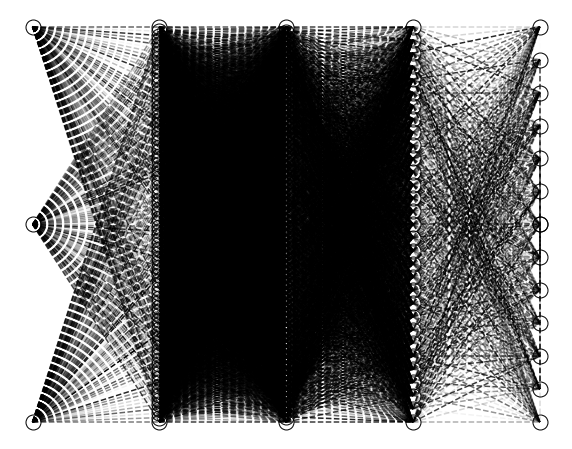

In [132]:
plot_rnn_keras(model)

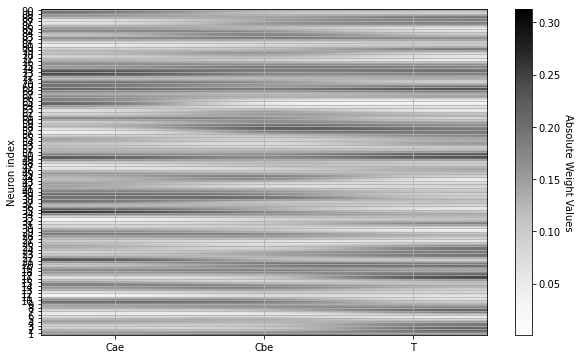

In [133]:
plot_first_layer_keras(model, label=x_cols)